In [79]:
%matplotlib inline
import xgboost as xgb
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

seed = 42

In [80]:
df = pd.read_excel('table_results_complete.xlsx')
df.head()

original filename           filename   ID    label  \
0  L014752P000136T1525948500W0109F3300.dat  neutral_12609.mat  205  neutral   
1  L014752P007119T1525947183W0112F3300.dat    train_24150.mat  366    train   
2  L014752P007084T1521118686W0136F3300.dat    train_23280.mat  358    train   
3  L014752P007706T1525947134W0126F3300.dat    train_33300.mat  455    train   
4  L014752P007883T1525948600W0150F3300.dat    train_35390.mat  478    train   

   10th percentile of 1. cepstral mean subtraction coeff.  \
0                                          -0.982736        
1                                          -1.286113        
2                                          -1.317864        
3                                          -0.866460        
4                                          -1.498598        

   10th percentile of 1. delta coeff. of cepstral mean subtraction coeff.  \
0                                          -0.234930                        
1                                          -0.121870                        
2                                          -0.195586                        
3                                          -0.111458                        
4                                          -0.202176                        

   10th percentile of 1. delta coeff. of linear frequency cepstral coefficients  \
0                                          -0.492827                              
1                                          -0.281532                              
2                                          -0.154806                              
3                                          -0.248059                              
4                                          -0.427680                              

   10th percentile of 1. delta coeff. of linear predictive cepstral coefficients  \
0                                          -0.047105                               
1                                          -0.064703                               
2                                          -0.026315                               
3                                          -0.029780                               
4                                          -0.019005                               

   10th percentile of 1. delta coeff. of mel frequency cepstral coefficients  \
0                                          -0.492827                           
1                                          -0.281532                           
2                                          -0.154806                           
3                                          -0.248059                           
4                                          -0.427680                           

   10th percentile of 1. linear frequency cepstral coefficients  \
0                                           3.964777              
1                                          -0.855625              
2                                           5.331015              
3                                           5.662880              
4                                           0.498028              

           ...           \
0          ...            
1          ...            
2          ...            
3          ...            
4          ...            

   var of 9. delta coeff. of linear frequency cepstral coefficients  \
0                                           0.005896                  
1                                           0.005329                  
2                                           0.007824                  
3                                           0.007974                  
4                                           0.004030                  

   var of 9. delta coeff. of mel frequency cepstral coefficients  \
0                                           0.012696               
1                                           0.004671               
2                                     

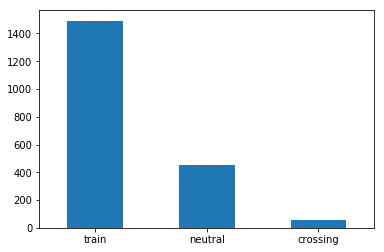

In [81]:
df['label'].value_counts().plot(kind='bar', rot=0)
plt.savefig('output/class_counts.pdf')
plt.savefig('output/class_counts.png')

In [82]:
lab_to_int = {'neutral': 0, 'crossing': 0, 'train': 1}
int_to_lab = {value: key for key, value in lab_to_int.items()}

df = df.replace(lab_to_int)
df.head()

original filename           filename   ID  label  \
0  L014752P000136T1525948500W0109F3300.dat  neutral_12609.mat  205      0   
1  L014752P007119T1525947183W0112F3300.dat    train_24150.mat  366      1   
2  L014752P007084T1521118686W0136F3300.dat    train_23280.mat  358      1   
3  L014752P007706T1525947134W0126F3300.dat    train_33300.mat  455      1   
4  L014752P007883T1525948600W0150F3300.dat    train_35390.mat  478      1   

   10th percentile of 1. cepstral mean subtraction coeff.  \
0                                          -0.982736        
1                                          -1.286113        
2                                          -1.317864        
3                                          -0.866460        
4                                          -1.498598        

   10th percentile of 1. delta coeff. of cepstral mean subtraction coeff.  \
0                                          -0.234930                        
1                                          -0.121870                        
2                                          -0.195586                        
3                                          -0.111458                        
4                                          -0.202176                        

   10th percentile of 1. delta coeff. of linear frequency cepstral coefficients  \
0                                          -0.492827                              
1                                          -0.281532                              
2                                          -0.154806                              
3                                          -0.248059                              
4                                          -0.427680                              

   10th percentile of 1. delta coeff. of linear predictive cepstral coefficients  \
0                                          -0.047105                               
1                                          -0.064703                               
2                                          -0.026315                               
3                                          -0.029780                               
4                                          -0.019005                               

   10th percentile of 1. delta coeff. of mel frequency cepstral coefficients  \
0                                          -0.492827                           
1                                          -0.281532                           
2                                          -0.154806                           
3                                          -0.248059                           
4                                          -0.427680                           

   10th percentile of 1. linear frequency cepstral coefficients  \
0                                           3.964777              
1                                          -0.855625              
2                                           5.331015              
3                                           5.662880              
4                                           0.498028              

           ...           \
0          ...            
1          ...            
2          ...            
3          ...            
4          ...            

   var of 9. delta coeff. of linear frequency cepstral coefficients  \
0                                           0.005896                  
1                                           0.005329                  
2                                           0.007824                  
3                                           0.007974                  
4                                           0.004030                  

   var of 9. delta coeff. of mel frequency cepstral coefficients  \
0                                           0.012696               
1                                           0.004671               
2                                           0.0126

In [83]:
X = df.iloc[:, 4:].values
y = df['label'].values

feature_names = df.columns.tolist()[4:]

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
X_train, X_val, y_train, y_val   = train_test_split(X_train, y_train, test_size=0.2, random_state=seed)

In [85]:
model = xgb.XGBClassifier().fit(X_train, y_train)
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [86]:
y_true = y_test
y_pred = model.predict(X_test)

D:\Programming\Anaconda3-64bit\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [87]:
print('Confusion matrix: \n')
print(confusion_matrix(y_true, y_pred))

Confusion matrix: 

[[ 89  12]
 [  5 294]]


In [88]:
print('Classification report: \n')
print(classification_report(y_true, y_pred))

Classification report: 

             precision    recall  f1-score   support

          0       0.95      0.88      0.91       101
          1       0.96      0.98      0.97       299

avg / total       0.96      0.96      0.96       400



In [89]:
def get_most_important_features(model, feat_names):
    imp_vals = model.get_booster().get_fscore()
    imp_list = [(feat_names[i],
                 'f'+str(i),
                 float(imp_vals.get('f'+str(i),0.)))
                for i in range(len(feat_names))]
    imp_list = sorted(imp_list, key=lambda x: x[2], reverse=True) 
    return imp_list

def print_most_important_features(model, feat_names, num_features=10):
    features = get_most_important_features(model, feat_names)
    to_print = len(features) if len(features) < num_features else num_features
    for i in range(to_print - 1):
        print(features[i])

print(print_most_important_features(model, feature_names))

('interdecile range of 2. delta coeff. of cepstral mean subtraction coeff.', 'f2893', 16.0)
('error of linear regression of 2. cepstral mean subtraction coeff.', 'f2442', 14.0)
('first correlation coefficient of short-time energy', 'f2620', 13.0)
('60th percentile of Teager Kaiser operator', 'f1476', 12.0)
('index of dispersion of short-time energy', 'f2842', 12.0)
('min. of spectral distance based on module', 'f4552', 10.0)
('median of Teager Kaiser operator', 'f4435', 9.0)
("Pearson's 1st skewness coeff. of Teager Kaiser operator", 'f2274', 8.0)
('first correlation coefficient of 2. linear frequency cepstral coefficients', 'f2563', 8.0)
None


In [90]:
# Visualize feature importance (type is either weight, gain or cover)
# Deatails here: https://github.com/dmlc/xgboost/blob/2e9d06443e4793231dd9ac841f7a7879f11b1d47/python-package/xgboost/plotting.py
xgb.plot_importance(model, importance_type='weight')